# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')
# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [49]:
# Checking the number of mice.
num_mice = merged_df['Mouse ID'].nunique()
num_mice

249

In [50]:
len(merged_df)

1893

In [51]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Idenitfy duplicate rows based on the subset of Timpoint and Mouse ID.
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

#Extract the 'Mouse ID' column from the Df containing the duplicate mice
duplicate_mice_by_id = duplicate_mice['Mouse ID'].unique()

print("Duplicate Mice by ID number that show up for Mouse ID and Timepoint:")
print(duplicate_mice_by_id)

Duplicate Mice by ID number that show up for Mouse ID and Timepoint:
['g989']


In [52]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_df[merged_df['Mouse ID'] == 'g989' ]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [53]:
len(merged_df)

1893

In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'] != 'g989'].drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [55]:
len(clean_df)

1880

In [56]:
# Checking the number of mice in the clean DataFrame.
num_mice_unique = clean_df['Mouse ID'].nunique()
num_mice_unique

248

## Summary Statistics

In [57]:
# Group the data by 'Drug Regimen' and calculate summary statistics
summary_table = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_table.columns = ['Mean', 'Median', 'Variance', 'Std. Deviation', 'SEM']

# Display the summary statistics table
summary_table

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# .Agg Function used to calculate multiple results at one given time.
summary_table = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_table.columns = ['Mean', 'Median', 'Variance', 'Std. Deviation', 'SEM']
summary_table

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [59]:
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

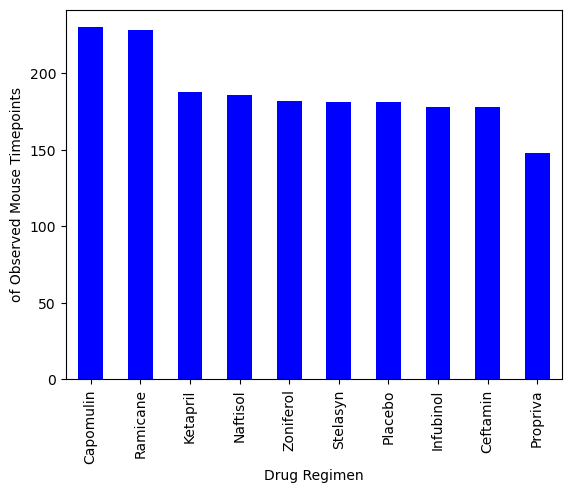

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_barplot = mice_count.plot.bar(color='b')
pandas_barplot.set_xlabel("Drug Regimen")
pandas_barplot.set_ylabel("of Observed Mouse Timepoints")
plt.show()

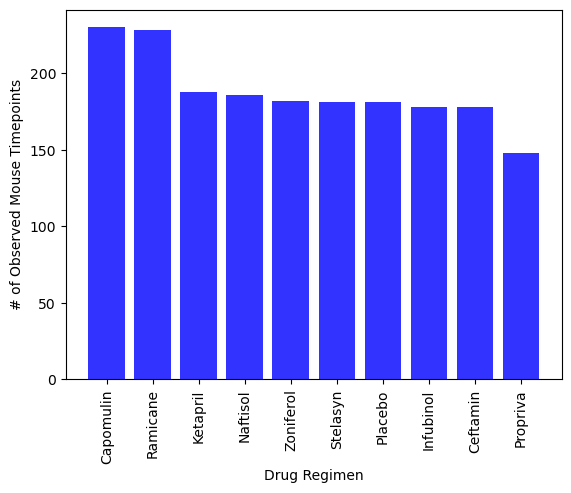

In [61]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values
# Create a Pyplot bar
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
# Set the xlabel and ylabel, title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

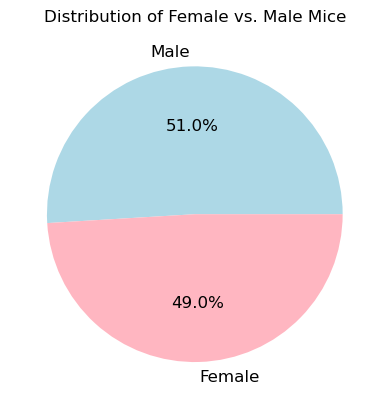

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
grouped_data = clean_df['Sex'].value_counts()

colors = ['lightblue', 'lightpink']
labels = ['Male', 'Female']

# Plot the pie chart
grouped_data.plot(kind='pie', colors=colors, autopct='%1.1f%%', labels=labels, textprops={'color': 'black', 'fontsize': 12})
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('')

plt.show()

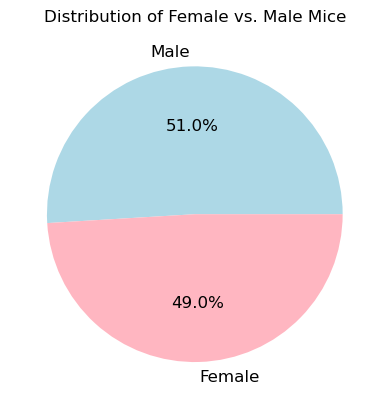

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
grouped_data = clean_df['Sex'].value_counts()

colors = ['lightblue', 'lightpink']
labels = ['Male', 'Female']

# Plot the pie chart
grouped_data.plot(kind='pie', colors=colors, autopct='%1.1f%%', labels=labels, textprops={'color': 'black', 'fontsize': 12})
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('')

plt.show()

## Quartiles, Outliers and Boxplots

In [64]:
# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
max_tumor
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged2_df = max_tumor.merge(clean_df, on= ["Mouse ID","Timepoint"], how="left")
merged2_df





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [65]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data =[]
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
 tumor_volume = merged2_df.loc[merged2_df["Drug Regimen"]== regimen,"Tumor Volume (mm3)"]
    # add subset
 tumor_vol_data.append(tumor_volume)
    # Determine outliers using upper and lower bounds
 quartiles = tumor_volume.quantile([.25,.5,.75])
 lower_quartiles = quartiles[.25]
 upper_quartiles = quartiles [.75]
 range = upper_quartiles-lower_quartiles
 upper_bounds = upper_quartiles + (1.5*range)
 lower_bounds = lower_quartiles - (1.5*range)
 outliers = tumor_volume.loc[(tumor_volume < lower_bounds) | (tumor_volume  > upper_bounds)]
 print(f"{regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

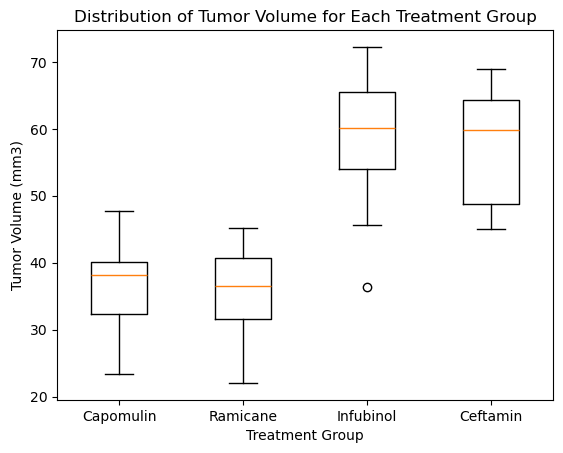

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_data_capomulin = merged2_df[merged2_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'].tolist()
tumor_volume_data_ramicane = merged2_df[merged2_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'].tolist()
tumor_volume_data_infubinol = merged2_df[merged2_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'].tolist()
tumor_volume_data_ceftamin = merged2_df[merged2_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)'].tolist()

data = [tumor_volume_data_capomulin, tumor_volume_data_ramicane, tumor_volume_data_infubinol,tumor_volume_data_ceftamin]
plt.boxplot(data, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

plt.show

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

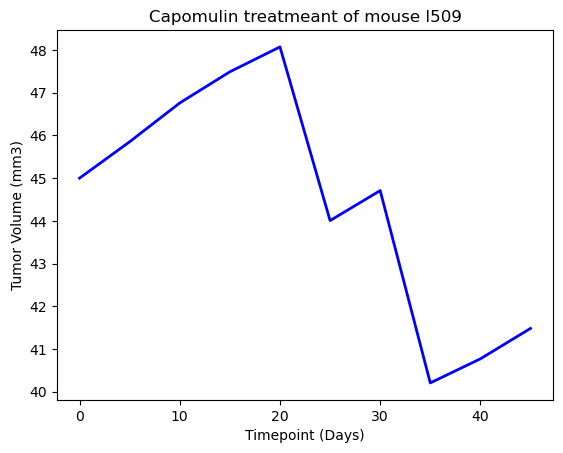

In [82]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#First set up Capomulin dataframe
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
lineplot_data = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509",:]
lineplot_data.head()
x_axis = lineplot_data["Timepoint"]
tumsiz = lineplot_data["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

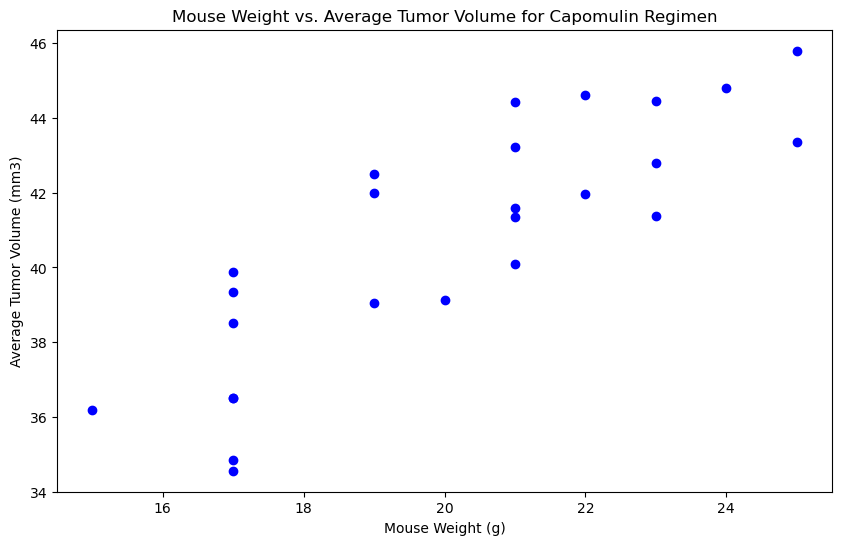

In [85]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each mouse
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color='b', marker='o')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Display the plot without grid lines
plt.grid(False)
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694722


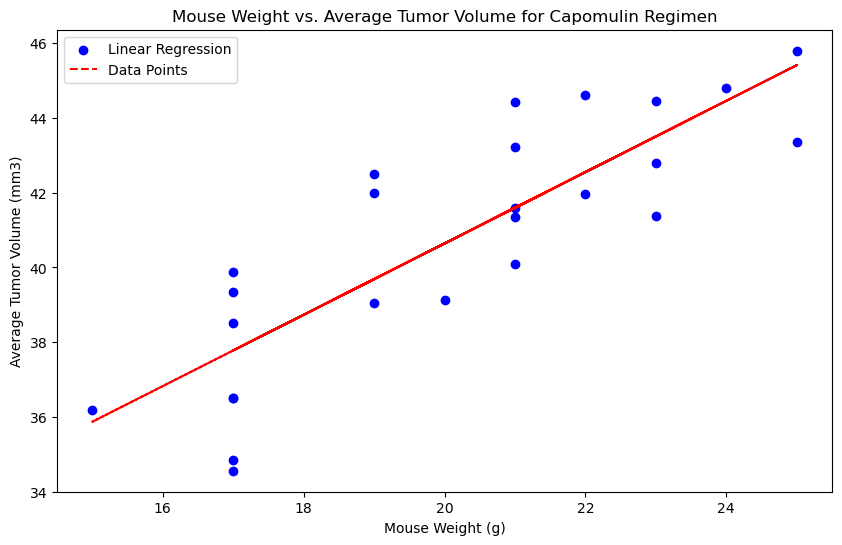

In [91]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
correlation_coefficient = mouse_weight.corr(avg_tumor_volume)
print(f"Correlation Coefficient: {correlation_coefficient}")

# Perform linear regression
slope, intercept, _, _, _ = linregress(mouse_weight, avg_tumor_volume)

# Plot the scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color='b', marker='o')

# Plot the linear regression line
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='r', linestyle='--')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Add legend for the linear regression line
plt.legend(['Linear Regression', 'Data Points'])

# Display the plot without grid lines
plt.grid(False)
plt.show()
